# Multi-Layer Perceptron for XOR Problem

This notebook implements a Multi-Layer Perceptron (MLP) from scratch in Python to solve the XOR binary classification problem. The MLP is trained using gradient descent, and the decision boundary is visualized.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MLPLayer:
    def __init__(self, input_dim, output_dim):
        # Initialize weights and biases
        self.weights = np.random.randn(input_dim, output_dim) * 0.1
        self.biases = np.zeros((1, output_dim))
        self.input = None
        self.z = None
        self.output = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, x):
        self.input = x
        self.z = np.dot(x, self.weights) + self.biases
        self.output = self.sigmoid(self.z)
        return self.output

    def backward(self, d_output, learning_rate):
        d_z = d_output * self.sigmoid_derivative(self.z)
        d_weights = np.dot(self.input.T, d_z)
        d_biases = np.sum(d_z, axis=0, keepdims=True)
        d_input = np.dot(d_z, self.weights.T)

        # Update weights and biases
        self.weights -= learning_rate * d_weights
        self.biases -= learning_rate * d_biases
        return d_input

class MLP:
    def __init__(self):
        self.layers = []

    def add_layer(self, input_dim, output_dim):
        self.layers.append(MLPLayer(input_dim, output_dim))

    def forward(self, x):
        activation = x
        for layer in self.layers:
            activation = layer.forward(activation)
        return activation

    def train(self, x, y, epochs=5000, learning_rate=0.1):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(x)
            # Compute loss (MSE)
            error = y - output
            d_output = -2 * error  # Derivative of MSE

            # Backward pass
            for layer in reversed(self.layers):
                d_output = layer.backward(d_output, learning_rate)

            # Print loss every 1000 epochs
            if (epoch + 1) % 1000 == 0:
                loss = np.mean(np.square(error))
                print(f'Epoch {epoch + 1}, Loss: {loss:.6f}')

In [3]:
# Prepare XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Shape: (4, 2)
y = np.array([[0], [1], [1], [0]])  # Shape: (4, 1)

# Initialize MLP
mlp = MLP()
mlp.add_layer(input_dim=2, output_dim=4)  # Hidden layer: 2 inputs -> 4 neurons
mlp.add_layer(input_dim=4, output_dim=1)  # Output layer: 4 inputs -> 1 neuron

# Train the MLP
mlp.train(X, y, epochs=5000, learning_rate=0.1)

Epoch 1000, Loss: 0.249999
Epoch 2000, Loss: 0.249999
Epoch 3000, Loss: 0.249998
Epoch 4000, Loss: 0.249997
Epoch 5000, Loss: 0.249996


In [4]:
# Test the MLP
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
for x1, x2 in test_inputs:
    input_vector = np.array([[x1, x2]])
    output = mlp.forward(input_vector)[0, 0]
    print(f'{x1} XOR {x2}: {round(output)}')

0 XOR 0: 0
0 XOR 1: 0
1 XOR 0: 1
1 XOR 1: 1


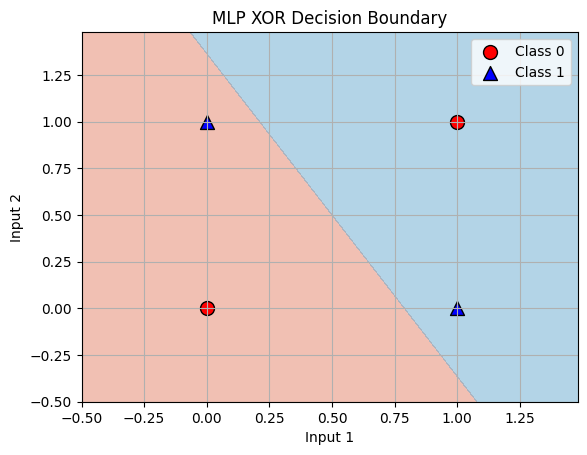

In [5]:
# Visualize decision boundary
h = 0.02
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prepare grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Shape: (n_points, 2)
Z = mlp.forward(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.5)

# Plot training points
train_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_labels = np.array([0, 1, 1, 0])
class0 = train_inputs[train_labels == 0]
class1 = train_inputs[train_labels == 1]

plt.scatter(class0[:, 0], class0[:, 1], c='red', marker='o', edgecolors='k', s=100, label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], c='blue', marker='^', edgecolors='k', s=100, label='Class 1')

plt.title('MLP XOR Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()